In [1]:
import numpy as np
import math
import lapjv as lapjv
import matplotlib.pyplot as plt
from scipy.spatial import distance
import datetime
import pandas as pd

In [36]:
N = 100
n = 700

r = np.sqrt(1/np.pi)

B0_x = np.random.random(n) * 2 * r*1.2 - r*1.2
B0_y = np.random.random(n) * 2 * r*1.2 - r*1.2
R0_x = np.random.random(n) * 2 * r*1.2 - r*1.2
R0_y = np.random.random(n) * 2 * r*1.2 - r*1.2 

B_x=[]; B_y=[];R_x=[]; R_y=[]; m_r=0; m_b=0

for i in range(n):
    if (m_b < N) & (math.hypot(B0_x[i]/1.2,B0_y[i]*1.2) < r):
        B_x.append(B0_x[i])
        B_y.append(B0_y[i])
        m_b+=1

for i in range(n):
    if (m_r < N) & (math.hypot(R0_x[i]/1.2,R0_y[i]*1.2) < r):
        R_x.append(R0_x[i])
        R_y.append(R0_y[i])
        m_r+=1
        
B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,N)).T
R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,N)).T
dis_star_matrix=np.zeros(shape=(N,N))    
piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(B1, R1, 'euclidean')**2)
R1_piopt=R1[piopt]

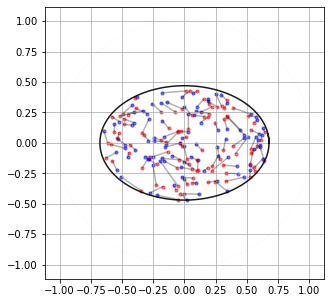

In [37]:
plt.figure(figsize=(5,5))

_t = np.arange(0,2.05,0.001)
_x = np.cos(_t*np.pi)*r*1.8
_y = np.sin(_t*np.pi)*r*1.8
plt.plot(_x,_y,'b-',color='black',alpha=0.01)

_t = np.arange(0,2.05,0.001)
_x = np.cos(_t*np.pi)*r*1.2
_y = np.sin(_t*np.pi)*r/1.2
plt.plot(_x,_y,'b-',color='black',alpha=0.9)
for i in range(N):
    plt.plot([B1[i,0],R1_piopt[i,0]], [B1[i,1],R1_piopt[i,1]], color='black', alpha=0.3)
    plt.scatter(B_x[i], B_y[i], color='b',s=10,alpha=0.5)
    plt.scatter(R_x[i], R_y[i], color='r',s=10,alpha=0.5) 
plt.grid(True)
plt.savefig('ell_0',dpi=600,bbox_inches = 'tight')

In [34]:
N = 100
n = 1000

r = np.sqrt(1/np.pi)

B0_x = np.random.random(n) * 2 * r*1.8 - r*1.8
B0_y = np.random.random(n) * 2 * r*1.8 - r*1.8
R0_x = np.random.random(n) * 2 * r*1.8 - r*1.8
R0_y = np.random.random(n) * 2 * r*1.8 - r*1.8

B_x=[]; B_y=[];R_x=[]; R_y=[]; m_r=0; m_b=0

for i in range(n):
    if (m_b < N) & (math.hypot(B0_x[i]/1.8,B0_y[i]*1.8) < r):
        B_x.append(B0_x[i])
        B_y.append(B0_y[i])
        m_b+=1

for i in range(n):
    if (m_r < N) & (math.hypot(R0_x[i]/1.8,R0_y[i]*1.8) < r):
        R_x.append(R0_x[i])
        R_y.append(R0_y[i])
        m_r+=1
        
B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,N)).T
R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,N)).T
dis_star_matrix=np.zeros(shape=(N,N))    
piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(B1, R1, 'euclidean')**2)
R1_piopt=R1[piopt]

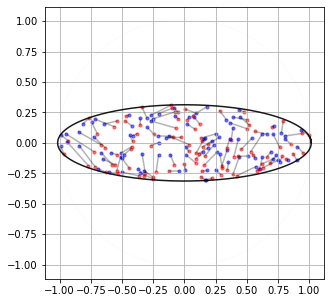

In [35]:
plt.figure(figsize=(5,5))

_t = np.arange(0,2.05,0.001)
_x = np.cos(_t*np.pi)*r*1.8
_y = np.sin(_t*np.pi)*r*1.8
plt.plot(_x,_y,'b-',color='black',alpha=0.01)

_t = np.arange(0,2.05,0.001)
_x = np.cos(_t*np.pi)*r*1.8
_y = np.sin(_t*np.pi)*r/1.8
plt.plot(_x,_y,'b-',color='black',alpha=0.9)
for i in range(N):
    plt.plot([B1[i,0],R1_piopt[i,0]], [B1[i,1],R1_piopt[i,1]], color='black', alpha=0.3)
    plt.scatter(B_x[i], B_y[i], color='b',s=10,alpha=0.5)
    plt.scatter(R_x[i], R_y[i], color='r',s=10,alpha=0.5) 
plt.grid(True)
plt.savefig('ell_3',dpi=600,bbox_inches = 'tight')